# <font color='blue'> **HiperGator Computing Resource Calculator**

# **1. Problem defination**

## The probelm: request computing resource inappropriately
The HiperGator users conducting bioinformatics tend to request more computing resources than their actual needs, resulting in the unnecessary occupy of computing resource; or request less and hence waste their own time.

## The solution: Machine Learning
Create a machine learning model to predict the computing time, for the certain input CPU and MEM.

## Key point: Translate the business problem into machine learning solutions

# **2. Load data**

In [1]:
import pandas as pd

df = pd.read_excel('hpg_cal_data.xlsx')
df

,search_type,database,file_size,cpu,mem,Time (h:m:s)
0,blastn,nt,169,1,1.0,0:8:16
1,blastn,nt,169,1,2.0,0:4:58
2,blastn,nt,169,1,4.0,0:5:36
3,blastn,nt,169,1,8.0,0:4:53
4,blastn,nt,169,1,16.0,0:8:53
...,...,...,...,...,...,...
561,diam_blastx,nr,1100,4,8.0,NaN
562,diam_blastx,nr,1100,4,16.0,17:27:54
563,diam_blastx,nr,1100,4,32.0,22:45:2
564,diam_blastx,nr,1100,4,64.0,19:34:43


In [4]:
df.head()

,search_type,database,file_size,cpu,mem,Time (h:m:s)
0,blastn,nt,169,1,1.0,0:8:16
1,blastn,nt,169,1,2.0,0:4:58
2,blastn,nt,169,1,4.0,0:5:36
3,blastn,nt,169,1,8.0,0:4:53
4,blastn,nt,169,1,16.0,0:8:53


In [5]:
df.tail()

,search_type,database,file_size,cpu,mem,Time (h:m:s)
561,diam_blastx,nr,1100,4,8.0,NaN
562,diam_blastx,nr,1100,4,16.0,17:27:54
563,diam_blastx,nr,1100,4,32.0,22:45:2
564,diam_blastx,nr,1100,4,64.0,19:34:43
565,diam_blastx,nr,1100,4,128.0,20:28:27


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   search_type   566 non-null    object 
 1   database      566 non-null    object 
 2   file_size     566 non-null    int64  
 3   cpu           566 non-null    int64  
 4   mem           564 non-null    float64
 5   Time (h:m:s)  562 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 26.7+ KB


# **3. Data preparation**

## Transform strings to numerical values

Create a funcition

In [7]:
def time2num(x):
    """
    This function transform Time (h:m:s) string to numerical value in hours.
    input: str
    output: float
    """
    if type(x) == str: # only works when x is a string
        time = x.split(':') # split at the ":", resulting in 3 parts indexed at 0, 1, 2
        # print(time[0], time[1], time[2])
        x = float(time[0]) + float(time[1])/60 + float(time[2])/3600  # convert to decimal hours
    return x

Test the function

In [8]:
time2num("20:28:27")

20.474166666666665

Apply the function **elementwise** to the *Time (h:m:s)* column using map()
https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html

In [9]:
df["Time (h:m:s)"].map(time2num)

0       0.137778
1       0.082778
2       0.093333
3       0.081389
4       0.148056
         ...    
561          NaN
562    17.465000
563    22.750556
564    19.578611
565    20.474167
Name: Time (h:m:s), Length: 566, dtype: float64

Add the result at **Series** data type to **DataFrame**

In [11]:
df['time_h'] = df["Time (h:m:s)"].map(time2num)
df

,search_type,database,file_size,cpu,mem,Time (h:m:s),time_h
0,blastn,nt,169,1,1.0,0:8:16,0.137778
1,blastn,nt,169,1,2.0,0:4:58,0.082778
2,blastn,nt,169,1,4.0,0:5:36,0.093333
3,blastn,nt,169,1,8.0,0:4:53,0.081389
4,blastn,nt,169,1,16.0,0:8:53,0.148056
...,...,...,...,...,...,...,...
561,diam_blastx,nr,1100,4,8.0,NaN,NaN
562,diam_blastx,nr,1100,4,16.0,17:27:54,17.465000
563,diam_blastx,nr,1100,4,32.0,22:45:2,22.750556
564,diam_blastx,nr,1100,4,64.0,19:34:43,19.578611


## Transform Catagorical Data to numerical values

**Notes**

1. Categorical variables include nominal variables and ordinal variables.
2. Nominal variables are simply names while ordinal varibales can be ranked.

One hot encoding:

In [15]:
# search_type
search_type_dum = pd.get_dummies(df.search_type, dtype=int)
search_type_dum

,blastn,blastp,blastx,diam_blastp,diam_blastx,tblastn,tblastx
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
561,0,0,0,0,1,0,0
562,0,0,0,0,1,0,0
563,0,0,0,0,1,0,0
564,0,0,0,0,1,0,0


In [16]:
# adjust the columns order
search_type_dum = search_type_dum[['blastn', 'blastp', 'blastx', 'tblastn', 'tblastx', 'diam_blastp', 'diam_blastx']]
search_type_dum

,blastn,blastp,blastx,tblastn,tblastx,diam_blastp,diam_blastx
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
561,0,0,0,0,0,0,1
562,0,0,0,0,0,0,1
563,0,0,0,0,0,0,1
564,0,0,0,0,0,0,1


In [20]:
# database
database_dum = pd.get_dummies(df.database, prefix='db', dtype=int)
database_dum

,db_nr,db_nt
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
561,1,0
562,1,0
563,1,0
564,1,0


## Merge dfs

In [21]:
df_ready = pd.concat([search_type_dum,
                    database_dum,
                    df[['file_size', 'cpu', 'mem', "time_h"]]],
                   axis=1)

df_ready

,blastn,blastp,blastx,tblastn,tblastx,diam_blastp,diam_blastx,db_nr,db_nt,file_size,cpu,mem,time_h
0,1,0,0,0,0,0,0,0,1,169,1,1.0,0.137778
1,1,0,0,0,0,0,0,0,1,169,1,2.0,0.082778
2,1,0,0,0,0,0,0,0,1,169,1,4.0,0.093333
3,1,0,0,0,0,0,0,0,1,169,1,8.0,0.081389
4,1,0,0,0,0,0,0,0,1,169,1,16.0,0.148056
...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,0,0,0,0,0,0,1,1,0,1100,4,8.0,NaN
562,0,0,0,0,0,0,1,1,0,1100,4,16.0,17.465000
563,0,0,0,0,0,0,1,1,0,1100,4,32.0,22.750556
564,0,0,0,0,0,0,1,1,0,1100,4,64.0,19.578611


## Deal with missing values

In [22]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   blastn       566 non-null    int64  
 1   blastp       566 non-null    int64  
 2   blastx       566 non-null    int64  
 3   tblastn      566 non-null    int64  
 4   tblastx      566 non-null    int64  
 5   diam_blastp  566 non-null    int64  
 6   diam_blastx  566 non-null    int64  
 7   db_nr        566 non-null    int64  
 8   db_nt        566 non-null    int64  
 9   file_size    566 non-null    int64  
 10  cpu          566 non-null    int64  
 11  mem          564 non-null    float64
 12  time_h       562 non-null    float64
dtypes: float64(2), int64(11)
memory usage: 57.6 KB


drop NaN

In [23]:
df_ready = df_ready.dropna()
# df_ready.dropna(inplace=True)

In [25]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 565
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   blastn       562 non-null    int64  
 1   blastp       562 non-null    int64  
 2   blastx       562 non-null    int64  
 3   tblastn      562 non-null    int64  
 4   tblastx      562 non-null    int64  
 5   diam_blastp  562 non-null    int64  
 6   diam_blastx  562 non-null    int64  
 7   db_nr        562 non-null    int64  
 8   db_nt        562 non-null    int64  
 9   file_size    562 non-null    int64  
 10  cpu          562 non-null    int64  
 11  mem          562 non-null    float64
 12  time_h       562 non-null    float64
dtypes: float64(2), int64(11)
memory usage: 61.5 KB


## Data separation as X and y

In [27]:
y = df_ready['time_h']
y

0       0.137778
1       0.082778
2       0.093333
3       0.081389
4       0.148056
         ...    
560    23.781667
562    17.465000
563    22.750556
564    19.578611
565    20.474167
Name: time_h, Length: 562, dtype: float64

In [28]:
X = df_ready.drop('time_h', axis=1)
X

,blastn,blastp,blastx,tblastn,tblastx,diam_blastp,diam_blastx,db_nr,db_nt,file_size,cpu,mem
0,1,0,0,0,0,0,0,0,1,169,1,1.0
1,1,0,0,0,0,0,0,0,1,169,1,2.0
2,1,0,0,0,0,0,0,0,1,169,1,4.0
3,1,0,0,0,0,0,0,0,1,169,1,8.0
4,1,0,0,0,0,0,0,0,1,169,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...
560,0,0,0,0,0,0,1,1,0,1100,2,128.0
562,0,0,0,0,0,0,1,1,0,1100,4,16.0
563,0,0,0,0,0,0,1,1,0,1100,4,32.0
564,0,0,0,0,0,0,1,1,0,1100,4,64.0


## Data splitting

In [29]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [30]:
X_train

,blastn,blastp,blastx,tblastn,tblastx,diam_blastp,diam_blastx,db_nr,db_nt,file_size,cpu,mem
391,0,0,0,1,0,0,0,0,1,1100,4,16.0
439,0,0,0,0,1,0,0,0,1,823,2,16.0
189,0,1,0,0,0,0,0,1,0,617,4,128.0
57,1,0,0,0,0,0,0,0,1,823,2,1.0
47,1,0,0,0,0,0,0,0,1,409,4,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...
184,0,1,0,0,0,0,0,1,0,617,4,4.0
447,0,0,0,0,1,0,0,0,1,823,4,64.0
551,0,0,0,0,0,0,1,1,0,617,4,64.0
542,0,0,0,0,0,0,1,1,0,617,1,32.0


In [31]:
X_test

,blastn,blastp,blastx,tblastn,tblastx,diam_blastp,diam_blastx,db_nr,db_nt,file_size,cpu,mem
93,1,0,0,0,0,0,0,0,1,1720,4,16.000
5,1,0,0,0,0,0,0,0,1,169,1,32.000
479,0,0,0,0,0,1,0,1,0,120,2,4.000
510,0,0,0,0,0,1,0,1,0,1100,2,128.000
240,0,0,1,0,0,0,0,1,0,169,4,16.000
...,...,...,...,...,...,...,...,...,...,...,...,...
121,0,1,0,0,0,0,0,1,0,120,1,0.512
122,0,1,0,0,0,0,0,1,0,120,1,1.000
312,0,0,1,0,0,0,0,1,0,3300,4,16.000
424,0,0,0,0,1,0,0,0,1,169,2,128.000


# **4. Modeling**

## **Linear Regression**

### **Training the model**

In [32]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### **Applying the model to make a prediction**

In [33]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [34]:
y_lr_train_pred

array([ 7.75618861e+00,  1.71972771e+01,  8.53827762e-01, -1.97671335e+00,
       -3.55530237e+00, -1.01289384e+00,  3.74812563e+00, -1.38258215e+00,
        3.54612895e+00, -8.52820359e-01,  9.61822549e+00, -4.85046957e-02,
        1.05397909e+01,  2.73427606e+00,  1.44955531e+01, -9.06469520e-01,
        7.19093409e-01, -3.03559984e+00, -1.85121397e+00,  1.45225815e+01,
        1.04587057e+01,  3.59342865e+00,  1.72918765e+01,  1.42481980e+01,
        1.05485286e+01,  8.73717122e+00,  8.14932052e+00, -1.88435654e+00,
        2.10445857e+01,  6.14358367e-01,  8.70970582e+00,  8.73801586e+00,
       -3.74648177e+00,  1.48874096e+01,  1.04002800e+01,  1.96126275e+00,
        9.71282488e+00,  4.06377448e+00,  1.96041812e+00, -1.83239049e-01,
        3.63704112e+00, -3.66003741e+00, -1.86472817e+00,  6.24494017e-01,
        1.72871000e+01, -1.65355996e-01,  1.48019556e+01, -9.42643262e-01,
       -1.47409433e+00,  1.49366899e+01,  3.79880387e+00,  1.42883329e+01,
        2.83085606e+00,  

In [35]:
y_lr_test_pred

array([ 1.97308768, -4.80050214,  5.31496438,  9.62300198, -2.89410839,
        3.96480623, 21.13440859,  8.66001788, -1.77012878, -3.69918207,
        3.66843837,  7.5465978 , 12.92978307, -1.86070669,  5.56334077,
       -1.91435585, -1.96130817, 21.14792279, 17.19290826,  0.76400486,
       -4.82415199,  3.55766254,  9.63173969,  2.73089751, -4.82584126,
        2.68598606,  7.74605296,  9.52403373, -3.79139322,  1.82568376,
       17.24696506, -2.90086549,  5.68933741, 14.38293232, 10.52487873,
       12.08197088,  7.7609651 , 13.16925246,  7.7069083 , -0.18562729,
        4.00971769,  9.49700533,  1.92380737, -0.82579196,  3.70898097,
        7.66199685,  1.87889592, 12.93316162, 14.16711277,  3.68195257,
       10.44519148, 21.13918508,  0.63800822, -2.799509  , -3.60935917,
       -2.00959817,  1.98660188,  1.87143985, -3.64990177,  7.45240604,
        7.47028909, -2.88059419,  0.77274257,  4.01886303,  3.64748544,
       14.89655499,  0.68291967, -3.78463612, 27.78994154,  5.77

### **Evaluate model performance**

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# train dataset
lr_train_mae = mean_absolute_error(y_train, y_lr_train_pred)
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

# test dataset
lr_test_mae = mean_absolute_error(y_test, y_lr_test_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [39]:
print('LR MAE (Train): ', lr_train_mae)
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)

print('LR MAE (Test): ', lr_test_mae)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MAE (Train):  3.815586676071797
LR MSE (Train):  62.3550695054512
LR R2 (Train):  0.4422586052673483
LR MAE (Test):  4.45242837535138
LR MSE (Test):  128.48781302035286
LR R2 (Test):  0.4185085117118771


In [54]:
lr_results = pd.DataFrame(['Linear regression', round(lr_train_mae, 3), round(lr_train_mse, 3), round(lr_train_r2, 3), round(lr_test_mae, 3), round(lr_test_mse, 3), round(lr_test_r2, 3)]).transpose()
lr_results.columns = ['Method', 'Train_MAE', 'Train_MSE', 'Train_R2', 'Test_MAE', 'Test_MSE', 'Test_R2']

In [55]:
lr_results

,Method,Train_MAE,Train_MSE,Train_R2,Test_MAE,Test_MSE,Test_R2
0,Linear regression,3.816,62.355,0.442,4.452,128.488,0.419


## **Random Forest**

### **Training the model**

In [50]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=2024)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=2024)

### **Applying the model to make a prediction**

In [51]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### **Evaluate model performance**

In [52]:
rf_train_mae = mean_absolute_error(y_train, y_rf_train_pred)
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mae = mean_absolute_error(y_test, y_rf_test_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [58]:
rf_results = pd.DataFrame(['Random Frest', round(rf_train_mae, 3), round(rf_train_mse, 3), round(rf_train_r2, 3), round(rf_test_mae, 3), round(rf_test_mse, 3), round(rf_test_r2, 3)]).transpose()
rf_results.columns = ['Method', 'Train_MAE', 'Train_MSE', 'Train_R2', 'Test_MAE', 'Test_MSE', 'Test_R2']
rf_results

,Method,Train_MAE,Train_MSE,Train_R2,Test_MAE,Test_MSE,Test_R2
0,Random Frest,0.216,0.486,0.996,0.714,2.972,0.987


## **Model comparison**

In [59]:
df_models = pd.concat([lr_results, rf_results], axis=0)

In [60]:
df_models.reset_index(drop=True)

,Method,Train_MAE,Train_MSE,Train_R2,Test_MAE,Test_MSE,Test_R2
0,Linear regression,3.816,62.355,0.442,4.452,128.488,0.419
1,Random Frest,0.216,0.486,0.996,0.714,2.972,0.987


## **Data visualization of prediction results**

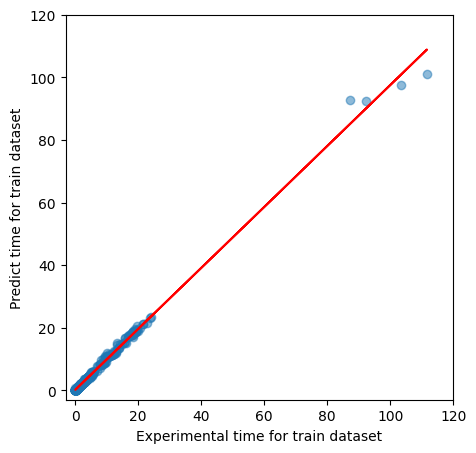

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Train dataset
plt.figure(figsize=(5,5))
plt.scatter(y_train, y_rf_train_pred, alpha=0.5)

z = np.polyfit(y_train, y_rf_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), 'r')

plt.ylabel('Predict time for train dataset')
plt.xlabel('Experimental time for train dataset')
plt.ylim(-3, 120)
plt.xlim(-3, 120)

plt.show()

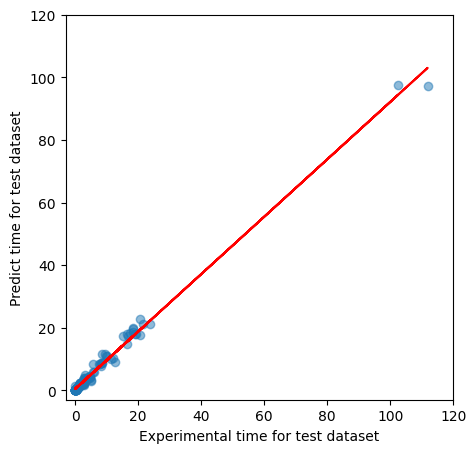

In [71]:
# Test dataset
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_rf_test_pred, alpha=0.5)

z = np.polyfit(y_test, y_rf_test_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), 'r')

plt.ylabel('Predict time for test dataset')
plt.xlabel('Experimental time for test dataset')
plt.ylim(-3, 120)
plt.xlim(-3, 120)

plt.show()

# **5. Model deployment**

## Predict in Jupyter Notebook

In [75]:
data = {"blastn": [0],
        "blastp":[0],
        "blastx":[1],
        "tblastn":[0],
        "tblastx":[0],
        "diam_blastp":[0],
        "diam_blastx":[0],
        "db_nr":[1],
        "db_nt":[0],
        "file_size":[2380],
        "cpu":[1],
        "mem":[32]}
dfp = pd.DataFrame(data)
dfp

,blastn,blastp,blastx,tblastn,tblastx,diam_blastp,diam_blastx,db_nr,db_nt,file_size,cpu,mem
0,0,0,1,0,0,0,0,1,0,2380,1,32


In [77]:
prediction=rf.predict(dfp)

In [81]:
print(f"The predicted computing time is: {round(prediction[0], 2)} h")

The predicted computing time is: 3.43 h


## Wrap as a web page

scource code:

https://github.com/baozh166/hpg-cal.git

## Deploy on cloud (GCP)

click and play

http://162.222.182.151:5000